<a href="https://colab.research.google.com/github/KrishKanojia/Data-Science-Practice/blob/main/IPL_RCB_VS_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [53]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Practice Dataset/innings_deliveries.csv')
df.head(15)

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
5,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,6,0,6,NaN,NaN,[]
6,Royal Challengers Bengaluru,1,F du Plessis,KK Ahmed,V Kohli,0,0,0,NaN,NaN,[]
7,Royal Challengers Bengaluru,1,F du Plessis,KK Ahmed,V Kohli,4,0,4,NaN,NaN,[]
8,Royal Challengers Bengaluru,1,F du Plessis,KK Ahmed,V Kohli,0,1,1,NaN,NaN,[]
9,Royal Challengers Bengaluru,1,V Kohli,KK Ahmed,F du Plessis,1,0,1,NaN,NaN,[]


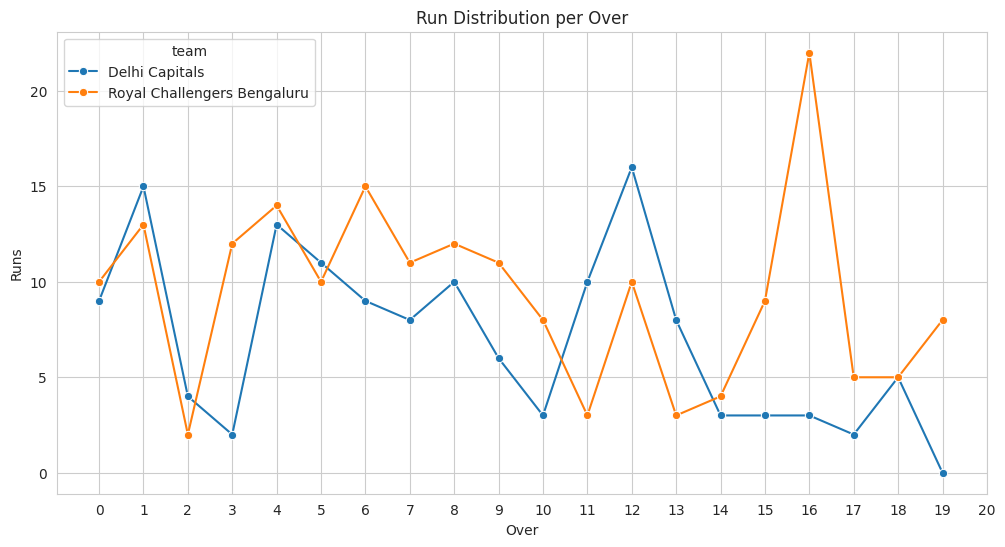

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Distribution of run per over
run_distribution = df.groupby(['team', 'over']).agg({'runs_total' : 'sum'}).reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title("Run Distribution per Over")
plt.xlabel("Over")
plt.ylabel("Runs")
plt.legend(title='team')
plt.xticks(range(0, 21)) # Over number from 0 to 20
plt.show()

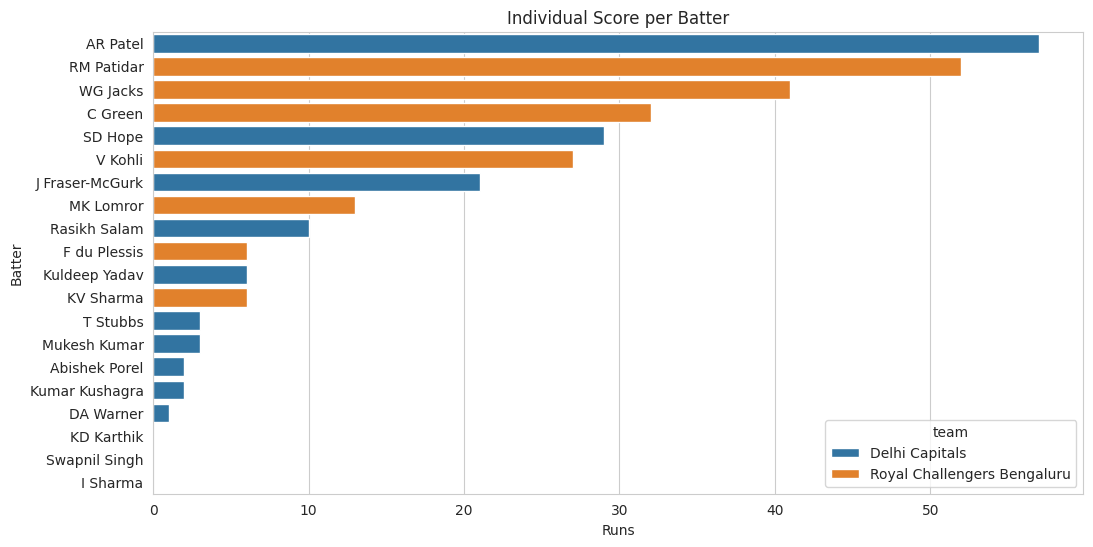

In [70]:
individual_score = df.groupby(['team', 'batter']).agg({"runs_batter": "sum"}).reset_index().sort_values(by="runs_batter", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y='batter', x='runs_batter', data=individual_score, hue='team')
plt.title("Individual Score per Batter")
plt.xlabel("Runs")
plt.ylabel("Batter")
plt.legend(title='team')
plt.show()


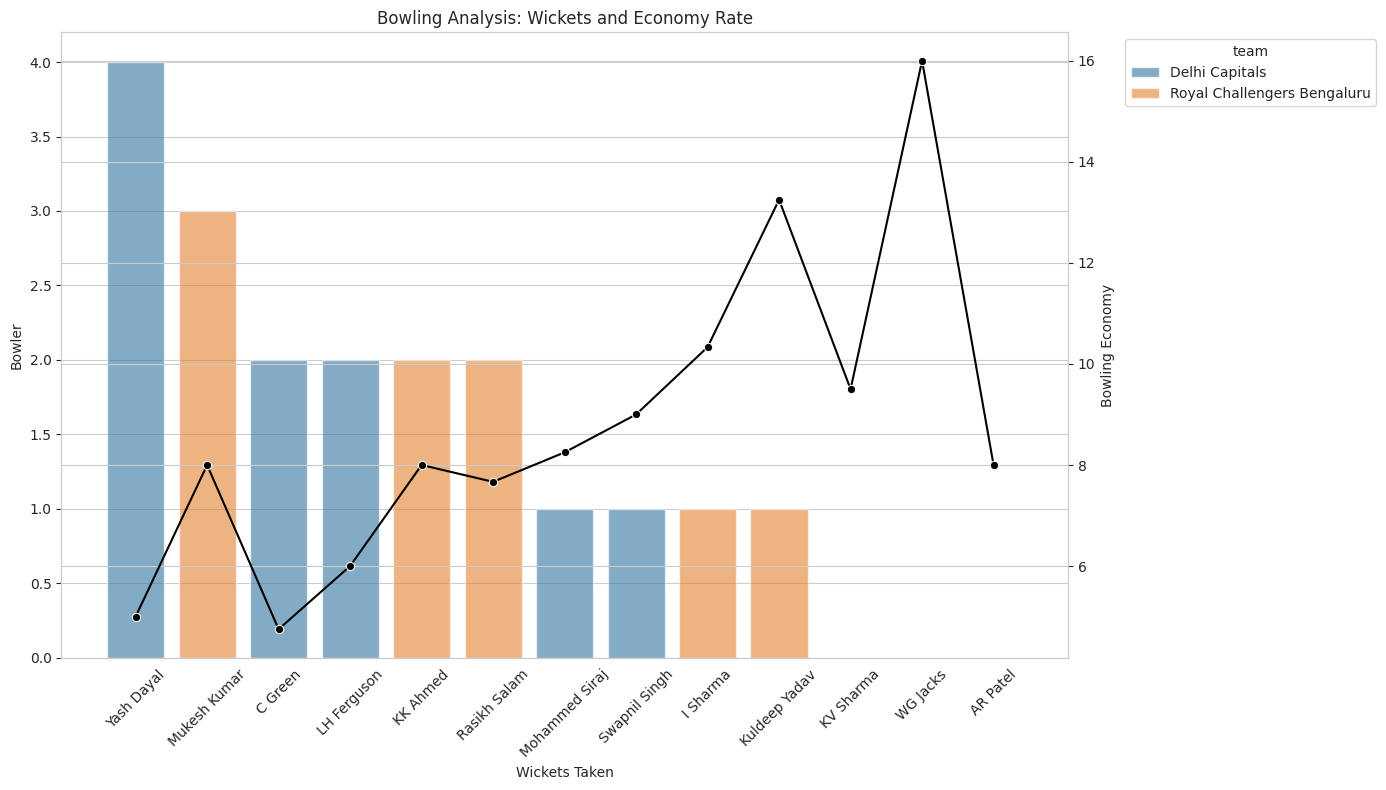

In [89]:
# Preparing data for bowling analysis
df['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken' : 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['bowling_economy'] = bowling_stats['runs_total']/ bowling_stats['over']
bowling_stats.sort_values(by=['wickets_taken'], ascending=False, inplace=True)

# create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(y='wickets_taken', x='bowler', data=bowling_stats, ax=ax1, hue='team', alpha=0.6)
ax1.set_title("Bowling Analysis: Wickets and Economy Rate")
ax1.set_xlabel("Wickets Taken")
ax1.set_ylabel("Bowler")
ax1.legend(title='team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
  item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(x='bowler', y='bowling_economy', data=bowling_stats, ax=ax2, marker='o', sort=False, color='black')
ax2.set_ylabel("Bowling Economy")
plt.tight_layout()
plt.show()

In [43]:
import ast
def convert_to_list(string):
    try:
        return ast.literal_eval(string)
    except (ValueError, SyntaxError):
        return string

# Apply the function to the 'fielders' column to convert strings to lists
df['fielders'] = df['fielders'].apply(convert_to_list)



def count_strings(lst):
    if isinstance(lst, list):
        return len(lst)
    return 0

# Apply the function to count strings in each list and store in a new column 'number'
df['number'] = df['fielders'].apply(count_strings)
len(df[df['number'] > 0])

17